In [29]:
import scipy.io
import numpy as np

import matplotlib

from matplotlib import pyplot as plt
%matplotlib inline 
import pylab as pl

In [30]:
data = scipy.io.loadmat('results/last/SILEX_results_all.mat')


FileNotFoundError: [Errno 2] No such file or directory: 'results/last/SILEX_results_all.mat'

In [ ]:
freq = data['frequencies'].flatten()


In [ ]:
data_8200=dict()
data_8200['freq'] = freq
data_8200['frf'] = data['FRF'][0]
data_8200['grad'] = data['FRFgrad'][0][0]

data_8201=dict()
data_8201['freq'] = freq
data_8201['frf'] = data['FRF'][1]
data_8201['grad'] = data['FRFgrad'][1][0]

data_8202=dict()
data_8202['freq'] = freq
data_8202['frf'] = data['FRF'][2]
data_8202['grad'] = data['FRFgrad'][2][0]


prefsquare=20e-6*20e-6
para_8200 = np.array([8200,8201,8202])/10000
para_6200 = np.array([6200,6201,6202])/10000

data_8200['dB'] = 10*np.log10(data_8200['frf']/prefsquare)
data_8201['dB'] = 10*np.log10(data_8201['frf']/prefsquare)
data_8202['dB'] = 10*np.log10(data_8202['frf']/prefsquare)
data_8200['grad_dB'] = 10/np.log(10)*data_8200['grad']/data_8200['frf']
data_8201['grad_dB'] = 10/np.log(10)*data_8201['grad']/data_8201['frf']
data_8202['grad_dB'] = 10/np.log(10)*data_8202['grad']/data_8202['frf']
data_8201['diff_dB'] = (data_8202['dB']-data_8200['dB'])/(para_8200[2]-para_8200[0])
data_8201['diff'] = (data_8202['frf']-data_8200['frf'])/(para_8200[2]-para_8200[0])


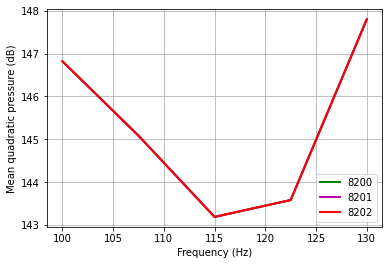

In [ ]:

plt.figure(1)
plt.clf()

plt.plot(data_8202['freq'],data_8200['dB'],'g-',label='8200', linewidth=2)
plt.plot(data_8202['freq'],data_8201['dB'],'m-',label='8201', linewidth=2)
plt.plot(data_8202['freq'],data_8202['dB'],'r-',label='8202', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean quadratic pressure (dB)')
plt.grid('on')
plt.legend(loc=4)

plt.show()


In [ ]:
data_8201

{'freq': array([100. , 107.5, 115. , 122.5, 130. ]),
 'frf': array([192333.24446231, 128980.82202125,  83384.18425622,  91288.26816164,
        241070.98619685]),
 'grad': array([-1.90677077e+15, -1.37651284e+15, -8.74480245e+14, -5.64447165e+14,
        -8.82610384e+14]),
 'dB': array([146.81994366, 145.08465149, 143.19023693, 143.58354977,
        147.80084953]),
 'grad_dB': array([-4.30554803e+10, -4.63489007e+10, -4.55460407e+10, -2.68529893e+10,
        -1.59004128e+10]),
 'diff_dB': array([ 1.291     ,  1.98730636,  2.05443695, -2.07595315, -5.71648745]),
 'diff': array([  57172.26011836,   59018.58768984,   39443.46075548,
         -43638.23315221, -317351.52641443])}

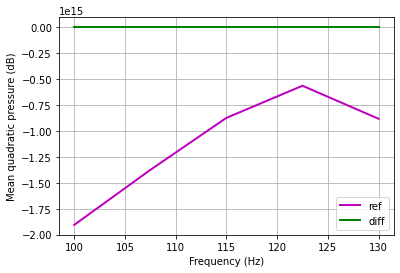

In [ ]:

plt.figure(2)
plt.clf()
plt.plot(data_8201['freq'],data_8201['grad'],'m-',label='ref', linewidth=2)
plt.plot(data_8201['freq'],data_8201['diff'],'g-',label='diff', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean quadratic pressure (dB)')
plt.grid('on')
plt.legend(loc=4)

plt.show()
